# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

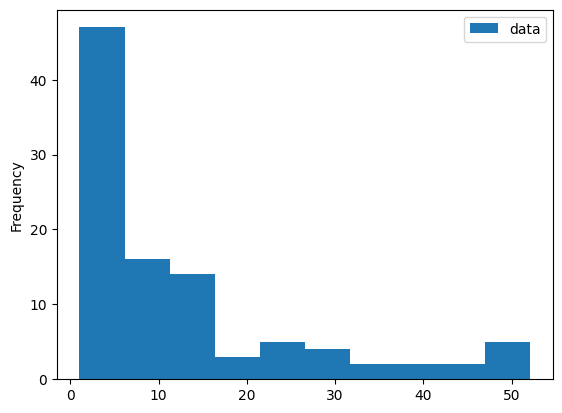

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

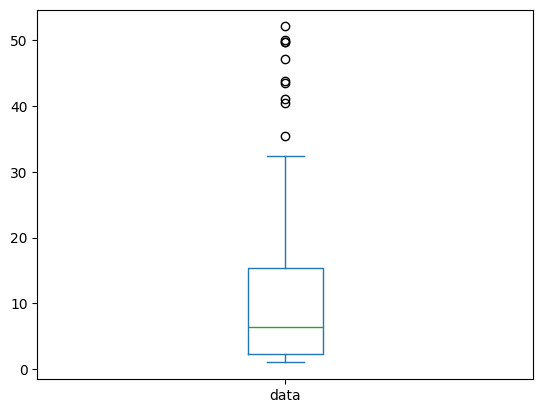

In [3]:
df.plot.box()

## Histogram

Pros:

    Shows the distribution of data across different price ranges.

    Highlights frequency, making it easy to see where most of the drug prices cluster.

    Displays skewness (if prices tend to be more concentrated at lower or higher values).

Cons:

    Does not explicitly display percentiles or extreme values.

    Can be affected by bin size, which may alter interpretation.

## Boxplot

Pros:

    Offers a concise summary of the data distribution.

    Clearly shows the median, quartiles, and outliers, which are critical for analyzing extreme drug prices.

    Helpful in comparing different datasets side by side.

Cons:

    Does not show frequency distribution, making it harder to see how prices are spread.

    Can be less intuitive for those unfamiliar with boxplots.

## Which would I choose?

A boxplot would be more effective if they mainly care about the higher-end drug prices, quartiles, and outliers. However, if they want a broader understanding of the overall price distribution, a histogram is preferable.
How to improve formatting?

    Histogram: Use a more refined bin size, add labels, and adjust colors to better highlight price ranges.

    Boxplot: Add grid lines, title, and annotate key percentiles for better readability.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

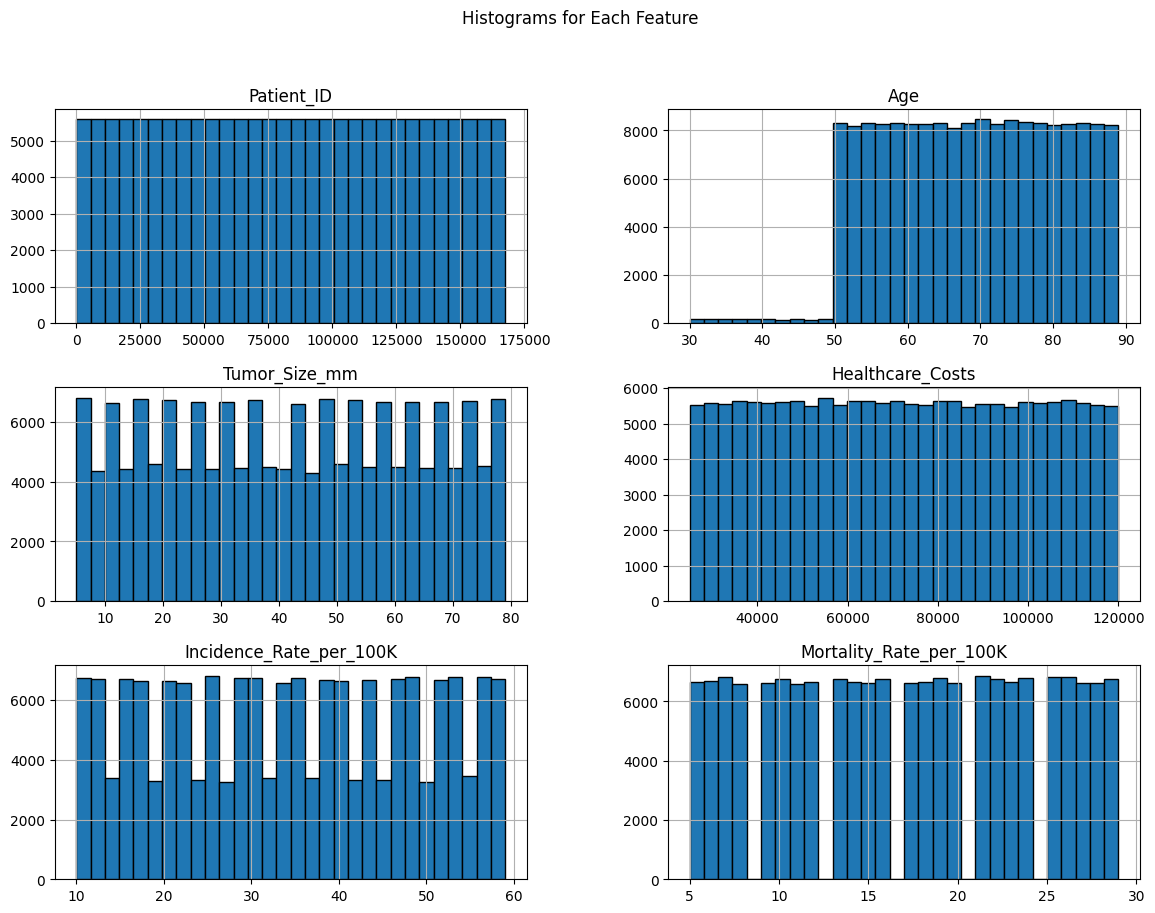

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("colorectal_cancer_dataset.csv")

df.hist(figsize=(14, 10), bins=30, edgecolor="black")
plt.suptitle("Histograms for Each Feature")
plt.show()


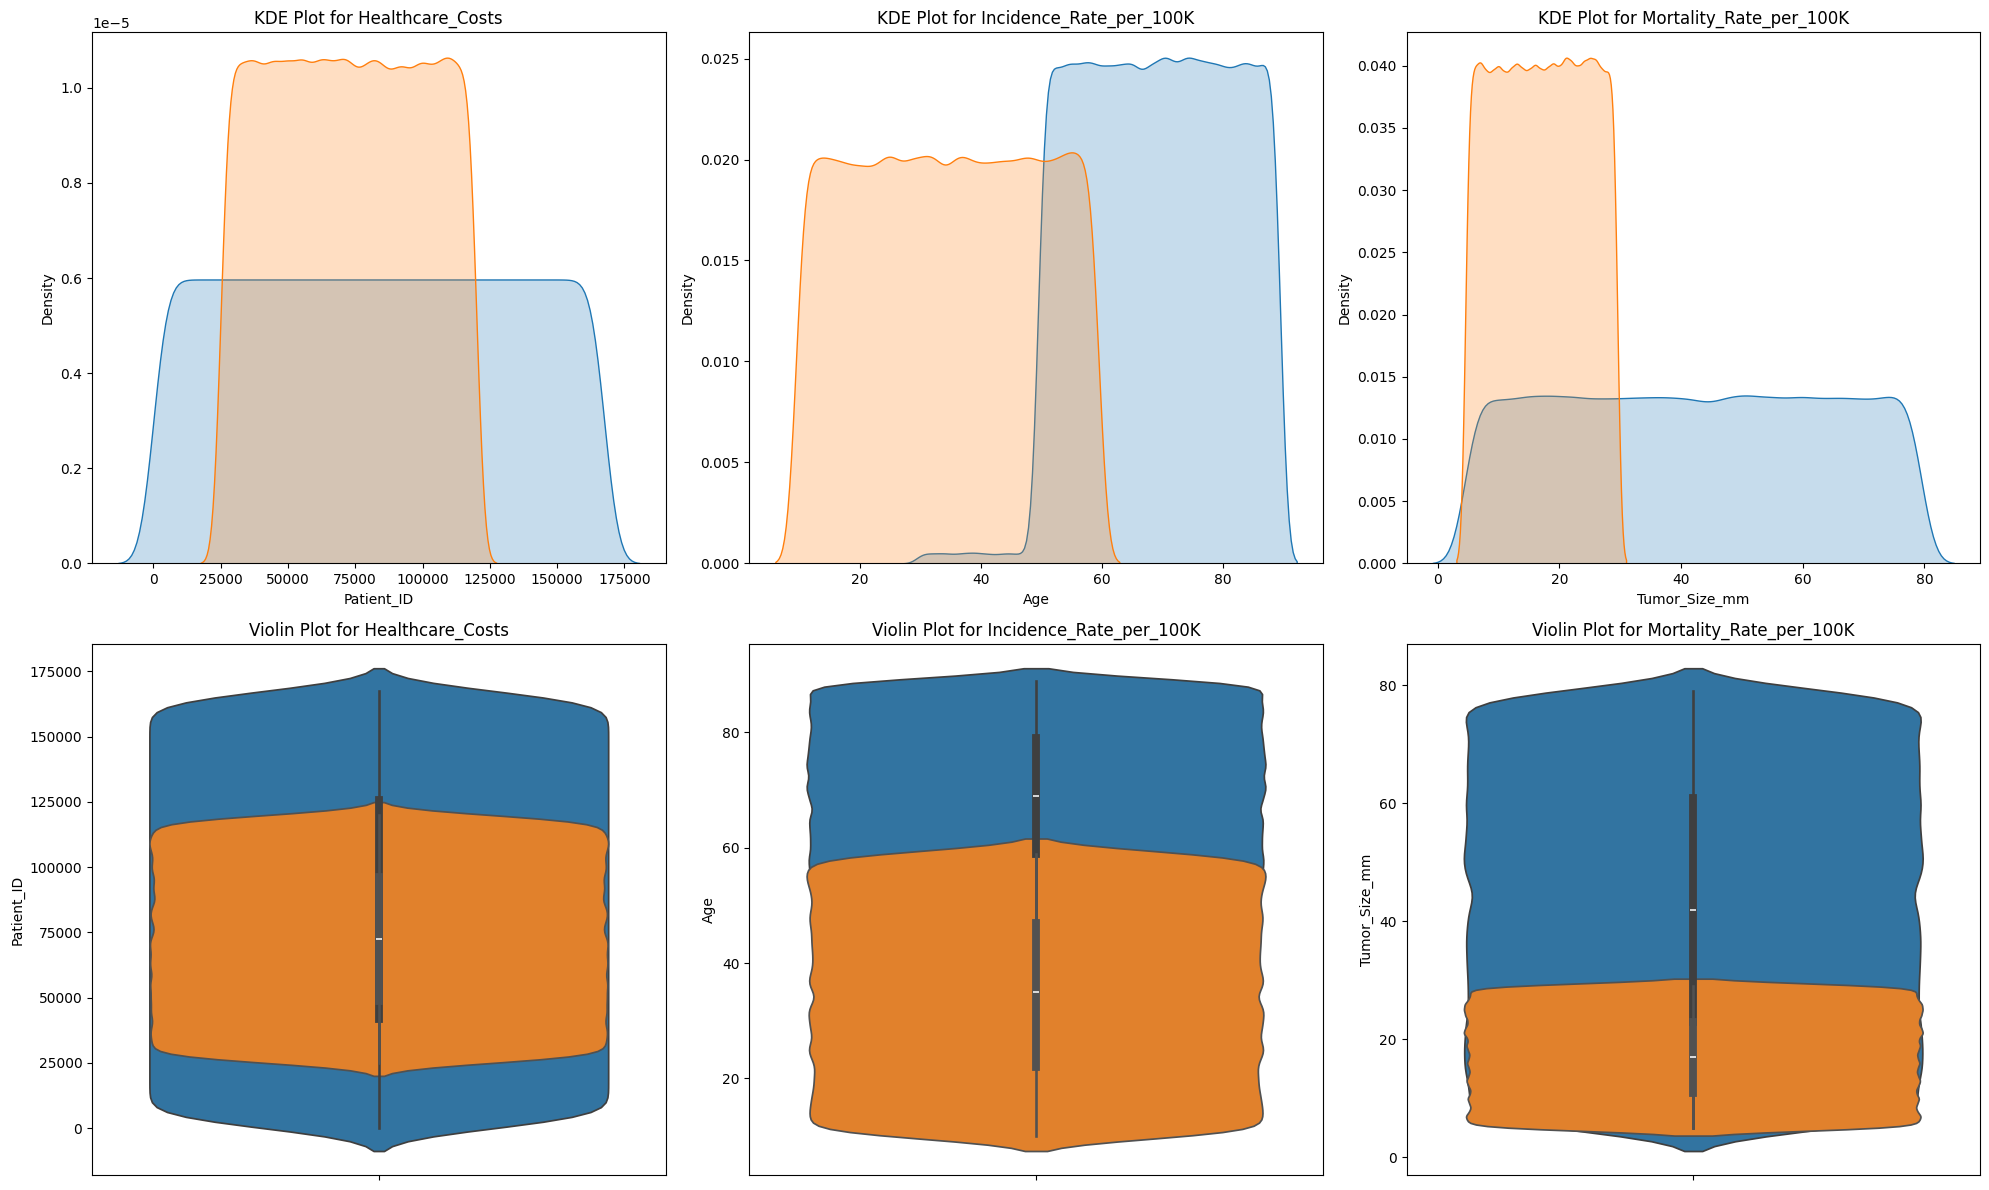

In [2]:
num_cols = df.select_dtypes(include=["number"]).columns
fig, axes = plt.subplots(nrows=2, ncols=len(num_cols)//2, figsize=(20, 12))

for i, col in enumerate(num_cols):
    sns.kdeplot(df[col], fill=True, ax=axes[0, i % (len(num_cols)//2)])
    axes[0, i % (len(num_cols)//2)].set_title(f"KDE Plot for {col}")

    sns.violinplot(y=df[col], ax=axes[1, i % (len(num_cols)//2)])
    axes[1, i % (len(num_cols)//2)].set_title(f"Violin Plot for {col}")

plt.tight_layout()
plt.show()



/tmp/ipykernel_2283/1795943740.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cancer Stage")


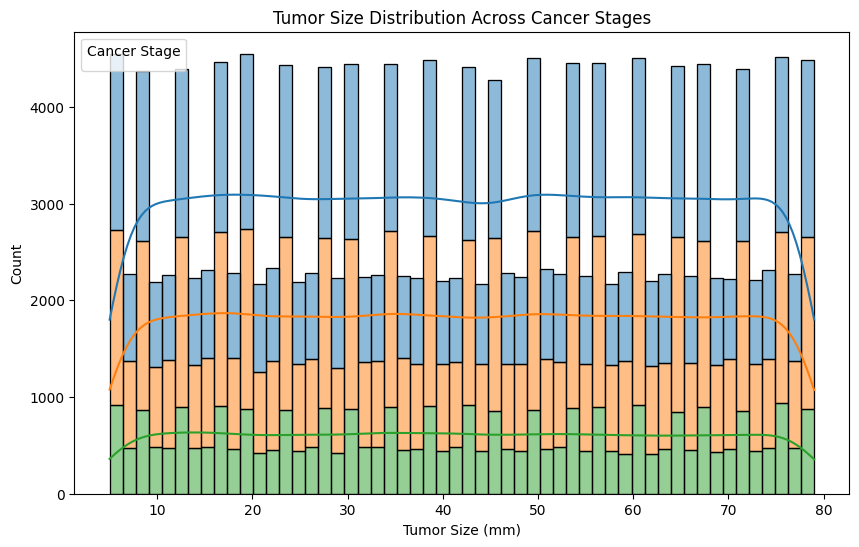

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Tumor_Size_mm", hue="Cancer_Stage", kde=True, multiple="stack")
plt.title("Tumor Size Distribution Across Cancer Stages")
plt.xlabel("Tumor Size (mm)")
plt.ylabel("Count")
plt.legend(title="Cancer Stage")
plt.show()

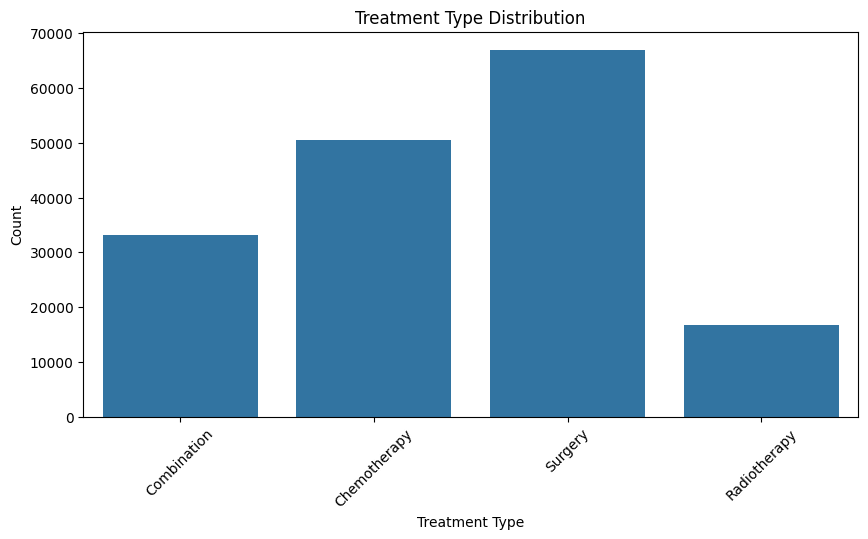

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Treatment_Type")
plt.title("Treatment Type Distribution")
plt.xlabel("Treatment Type")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()


In [8]:
numeric_columns = df.select_dtypes(include=["number"]).columns

summary_stats = {}
for col in numeric_columns:
    summary_stats[col] = {
        "Mean": df[col].mean(),
        "Median": df[col].median(),
        "Mode": df[col].mode().values.tolist()
    }

stats_df = pd.DataFrame(summary_stats).T 

print(stats_df)

                                 Mean   Median  \
Patient_ID                    83749.0  83749.0   
Age                          69.20078     69.0   
Tumor_Size_mm               42.005708     42.0   
Healthcare_Costs         72452.168099  72344.0   
Incidence_Rate_per_100K     34.531562     35.0   
Mortality_Rate_per_100K     17.023875     17.0   

                                                                      Mode  
Patient_ID               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...  
Age                                                                   [74]  
Tumor_Size_mm                                                         [22]  
Healthcare_Costs                                           [53546, 102006]  
Incidence_Rate_per_100K                                               [25]  
Mortality_Rate_per_100K                                               [21]  


## **Colorectal Cancer Data Analysis Summary**

### **1. Tumor Size Across Cancer Stages**
- Tumor sizes vary across stages, with more early detections at smaller sizes.
- Higher stages show a broader distribution, suggesting diverse progression rates.

### **2. Treatment Type Distribution**
- **Surgery** is the most common (~70K cases), followed by **chemotherapy** (~50K).
- **Combination therapy** is used frequently (~35K), while **radiotherapy** is least common (~15K).

### **3. Summary Statistics**
- **Age:** Mean = 69.2 years, Median = 69 years.
- **Tumor Size:** Mean = 42.1 mm, Median = 42 mm.
- **Healthcare Costs:** Mean = $72,452.
- **Incidence Rate:** 34.5 per 100K.
- **Mortality Rate:** 17.0 per 100K.

### **4. Distribution Insights**
- KDE and violin plots show density distributions for **healthcare costs, incidence, and mortality rates**.
- Histograms reveal a **clustered age distribution (50–90 years)** and an even spread in **tumor sizes** and **healthcare costs**.

Would you like deeper comparisons or predictive modeling based on these trends?


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

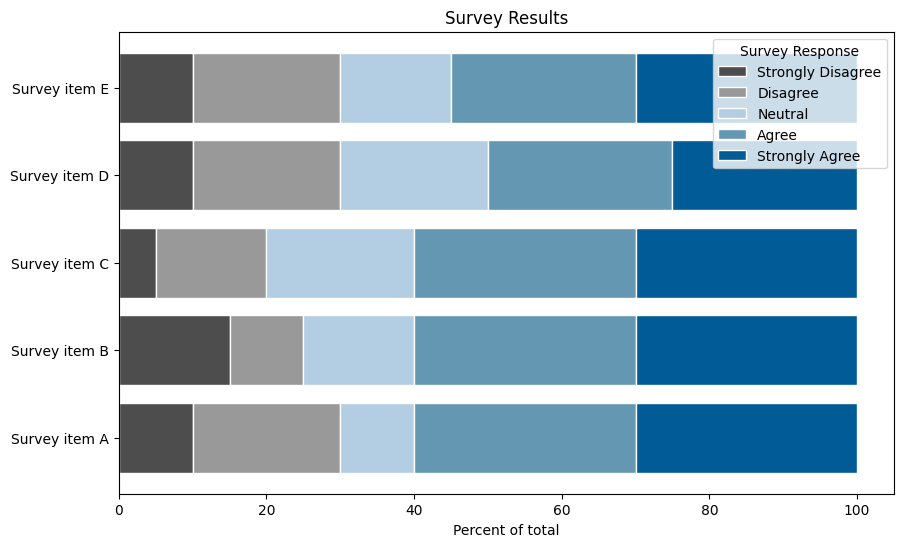

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

survey_items = ['Survey item A', 'Survey item B', 'Survey item C', 'Survey item D', 'Survey item E']
categories = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
data = np.array([
    [10, 20, 10, 30, 30],
    [15, 10, 15, 30, 30],
    [5, 15, 20, 30, 30],
    [10, 20, 20, 25, 25],
    [10, 20, 15, 25, 30]
])

colors = ['#4d4d4d', '#999999', '#b3cde3', '#6497b1', '#005b96']

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(categories)):
    bottom = np.sum(data[:, :i], axis=1) if i > 0 else None
    ax.barh(survey_items, data[:, i], left=bottom, color=colors[i], edgecolor='white', label=categories[i])

ax.legend(title="Survey Response", loc='upper right')

ax.set_xlabel('Percent of total')
ax.set_title('Survey Results')

plt.show()
